# ** Telecom Customer Retention**

In [63]:
import pandas as pd

In [64]:
df=pd.read_csv("/content/1730285168-TelecomCustomerChurn (1).csv")

**EDA**

In [65]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [66]:
df.shape

(7043, 21)

In [67]:
df.columns


Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [68]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [70]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [71]:
df.isnull().sum()

,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [72]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool>

In [73]:
df.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [74]:
Y=df['Churn']
X=df.drop(['customerID','Churn'],axis=1)
X.head
Y.value_counts()

,count
Churn,
No,5174
Yes,1869


In [75]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, Y = ros.fit_resample(X, Y)

X.head()
Y.value_counts()


,count
Churn,
No,5174
Yes,5174


In [76]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
X = oe.fit_transform(X)

X[:5]  # Display first rows


array([[0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.420e+02,
        2.505e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.400e+01, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 4.980e+02,
        1.466e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 4.360e+02,
        1.570e+02],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.500e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.660e+02,
        1.400e+03],
       [0.000e+00, 0.000e+00, 0.

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2529
)


In [78]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)


RandomForestClassifier()

In [79]:
Y_pred = rfc.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

          No       0.95      0.82      0.88      1004
         Yes       0.85      0.96      0.90      1066

    accuracy                           0.89      2070
   macro avg       0.90      0.89      0.89      2070
weighted avg       0.90      0.89      0.89      2070



In [80]:
# Drop null rows
df.dropna(inplace=True)

In [81]:
# Remove the customerID column (the first column)
df_x = df.iloc[:,1:]

In [82]:
# Convert the predictor variable into binary
df_x['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_x['Churn'].replace(to_replace='No',  value=0, inplace=True)

/tmp/ipython-input-1976435534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_x['Churn'].replace(to_replace='Yes', value=1, inplace=True)
/tmp/ipython-input-1976435534.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [83]:
# One hot encode categorical values
df_dummies = pd.get_dummies(df_x)
df_dummies.head()

,SeniorCitizen,Tenure,MonthlyCharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,0,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,1,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,0,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,1,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


 chart to visualize

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

sns.set_style("darkgrid")

# Overall color
single_color = "#2a9d8f"
dual_color = ['#e76f51','#2a9d8f']
triple_color = ['#e76f51','#2a9d8f','#264653']

In [ ]:
#Get Correlation of "Churn" with other variables:

fig = plt.figure(figsize=(8,10))
corr_plot = df_dummies.corr()['Churn']

head = corr_plot.sort_values(ascending=False)

sns.barplot(x=head.values, y=head.index,color=single_color)
plt.title("Variables correlation with churn")
plt.show()

1. **Demographics**

a) Gender distribution

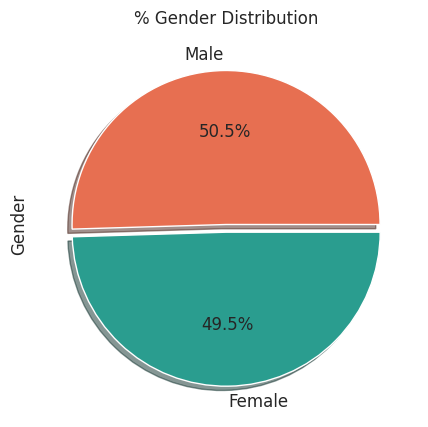

In [85]:
fig = plt.figure(facecolor='white')
explode=[0,0.05]
ax = (df['Gender'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = df['Gender'].value_counts().index,figsize =(5,5), fontsize = 12,colors=dual_color,shadow=True,explode=explode)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Gender',fontsize = 12)
ax.set_title('% Gender Distribution', fontsize = 12)

plt.show()

### b) Age distribution

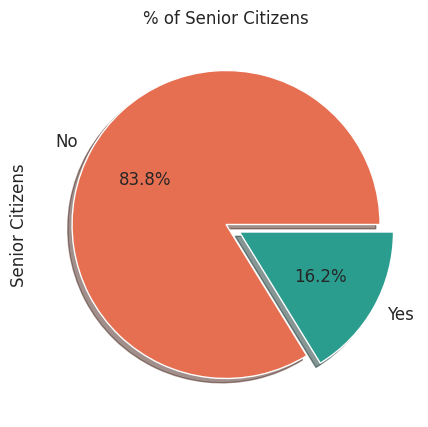

In [86]:
fig = plt.figure(facecolor='white')
explode=[0,0.1]
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12,colors=dual_color,shadow=True,explode=explode)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

plt.show()

### c) Partner and dependent status

<Figure size 640x480 with 0 Axes>

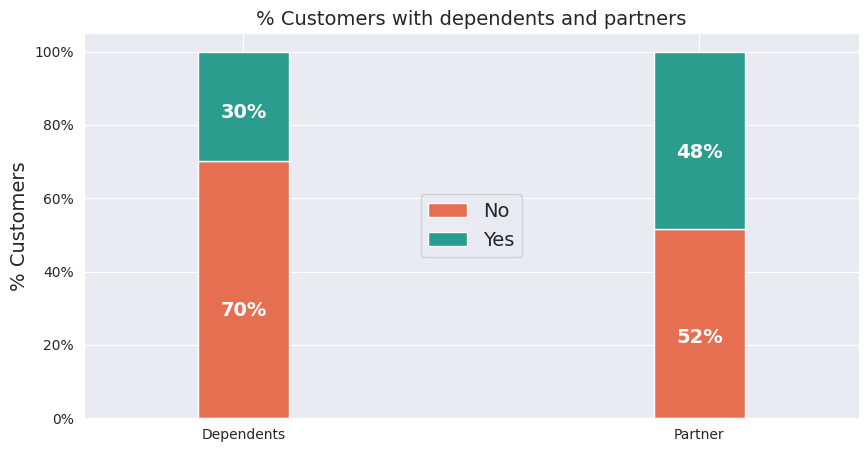

In [87]:
fig = plt.figure(facecolor='white')

df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=dual_color,figsize=(10,5),rot = 0,width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

## 2. Customer telco account information
Let's first undestand the personal information of our telco customers

### a) Tenure

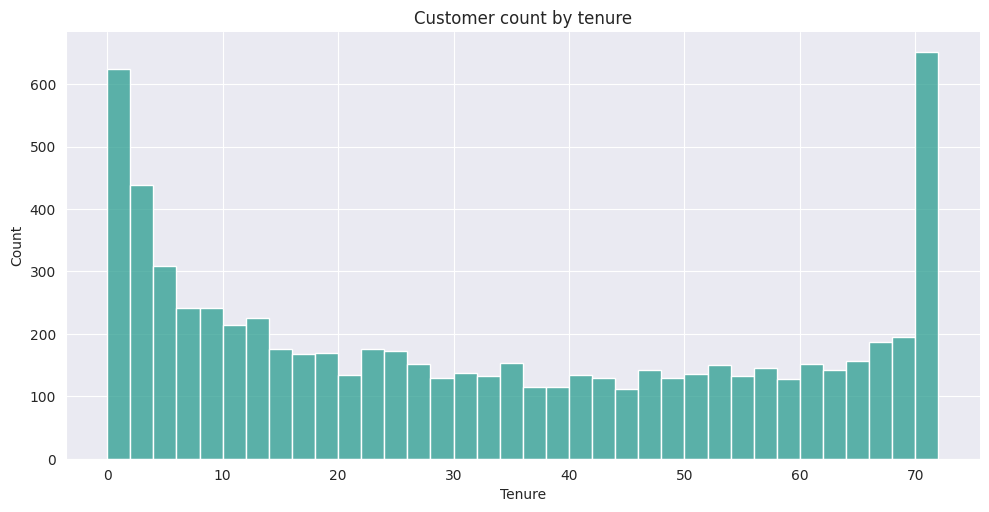

In [88]:
#Get Correlation of "Churn" with other variables:

sns.displot(data=df, x="Tenure",bins=int(180/5),height=5,aspect=2, color=single_color)
plt.title('Customer count by tenure')
plt.show()

### b) Contracts

/tmp/ipython-input-2643132244.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Contract", data=df,palette=triple_color)


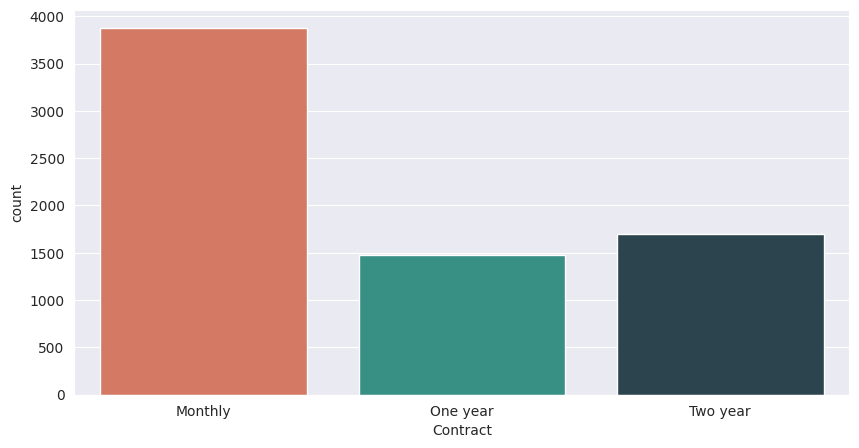

In [89]:
fig = plt.figure(figsize=(10,5),facecolor='white')
sns.countplot(x="Contract", data=df,palette=triple_color)
plt.show()

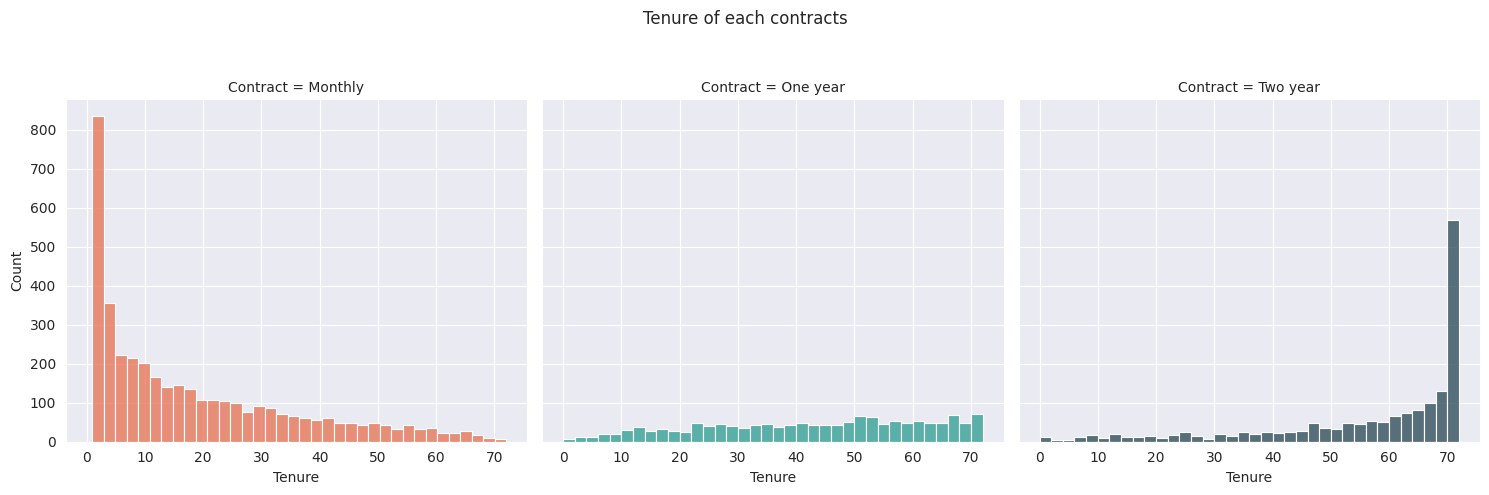

In [90]:
d = {'color': triple_color}
g = sns.FacetGrid(df, col="Contract",palette=triple_color,height=5, aspect=1,hue_kws=d, hue='Contract')
g.map(sns.histplot, "Tenure",bins=int(180/5),color=single_color)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Tenure of each contracts')
plt.show()

## 3. Distribution of customer's telco service
Let's see what are the services favored by the telco customers.

In [91]:
# View columns names to identify services
df.columns.values

array(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [92]:
#Create list of services
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',\
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

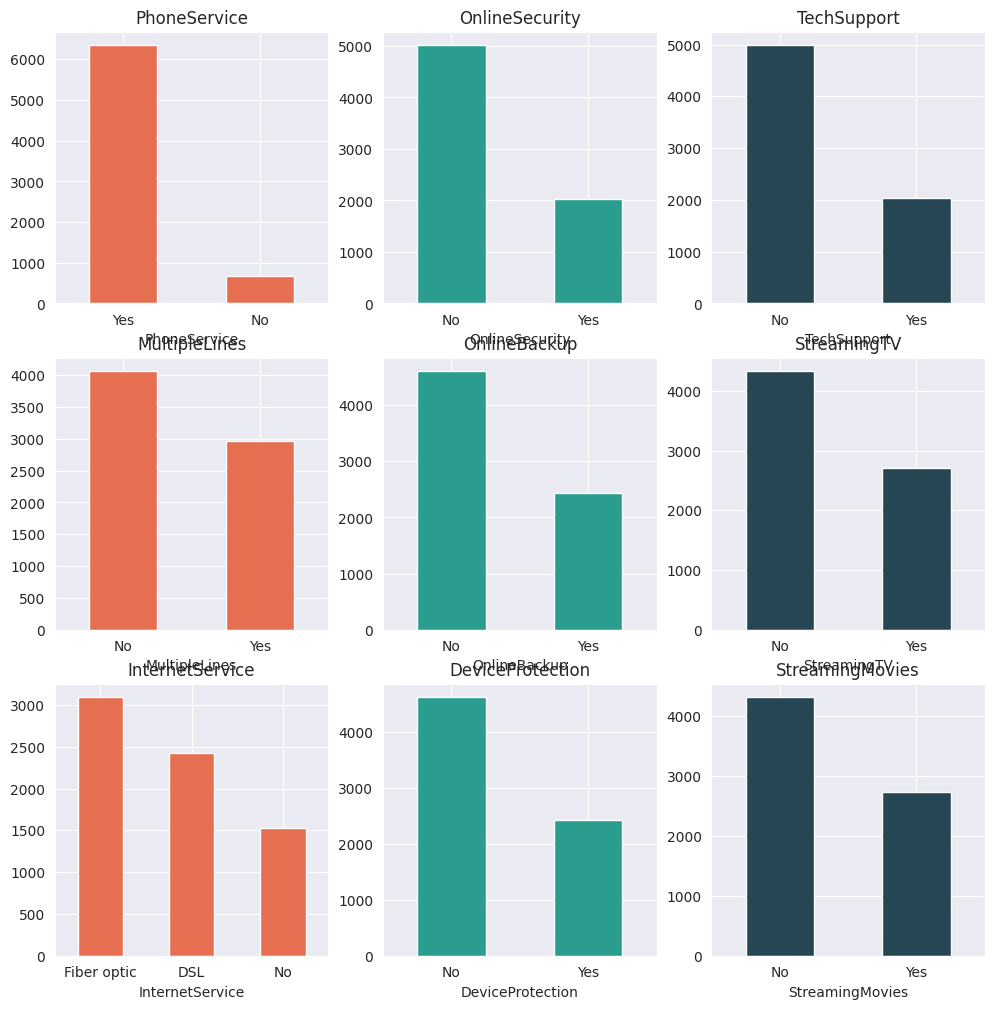

In [93]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(12,12),facecolor='white')
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind='bar',ax=axes[i,0],rot=0,color=triple_color[0])

    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind='bar',ax=axes[i-3,1],rot=0,color=triple_color[1])

    elif i < 9:
        ax = df[item].value_counts().plot(kind='bar',ax=axes[i-6,2],rot=0,color=triple_color[2])
    ax.set_title(item)

## 4. Correlation between monthly and total charges

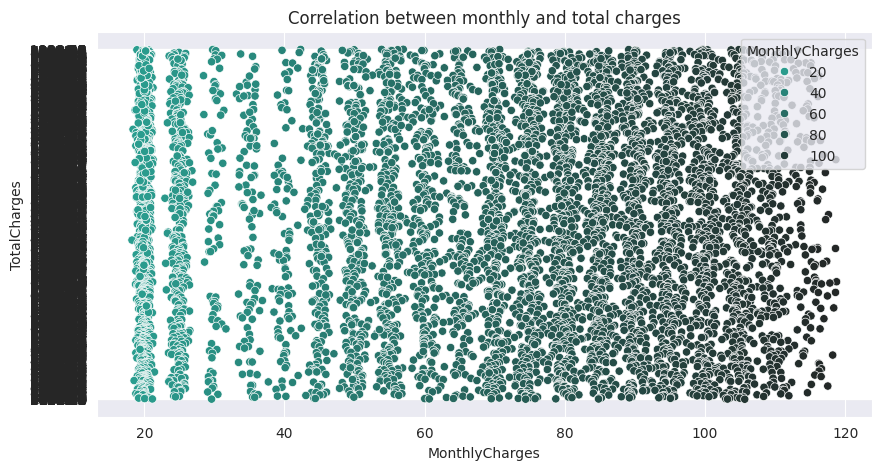

In [94]:
fig=plt.figure(figsize=(10,5),facecolor='white')
plt.title('Correlation between monthly and total charges')
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges",hue='MonthlyCharges',palette=sns.dark_palette(triple_color[1], reverse=True, as_cmap=True))
plt.show()

## 5. Churn predictor variable

### a) Overall churn rate

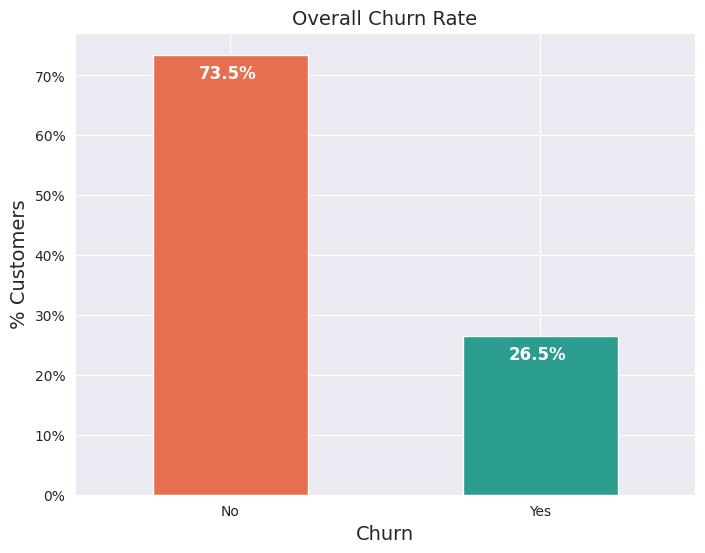

In [95]:
ax = (df['Churn'].value_counts()*100.0 /len(df))\
.plot(kind='bar',
      stacked = True,
      rot = 0,color = dual_color,
      figsize = (8,6)
     )

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Overall Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold') # Removed 'size = 14' to resolve the TypeError

In [103]:
Y_train.value_counts()

,count
Churn,
No,4170
Yes,4108


In [97]:
# Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
#Logistic Regression model
lr_model=LogisticRegression(C=10).fit(X_train,Y_train)

#Support Vector Machine
svm_model=SVC(C=1.5,kernel='linear').fit(X_train,Y_train)

# Neural Network
from sklearn.neural_network import MLPClassifier
nn_model=MLPClassifier(activation='logistic',
                       alpha=0.009,
                       validation_fraction=0.2).fit(X_train,Y_train)

#print model scores
print('Logistic Regression Accuracy: {:.2f}%'.format(lr_model.score(X_test,y_test)*100))
print('Support Vector Machine Accuracy: {:.2f}%'.format(svm_model.score(X_test,y_test)*100))
print('Neural Network Accuracy: {:.2f}%'.format(nn_model.score(X_test,y_test)*100))

In [ ]:
from sklearn.metrics import f1_score as f1
#make predictions
lr_pred = lr_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
nn_pred = nn_model.predict(X_test)

#Print model's prediction f1 score
print('Logistic Regression Accuracy: {:.2f}%'.format(f1(y_test, lr_pred)*100))
print('Support Vector Machine Accuracy: {:.2f}%'.format(f1(y_test, svm_pred)*100))
print('Neural Network Accuracy: {:.2f}%'.format(f1(y_test, nn_pred)*100))

## Evaluation

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig, axs = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(15, 4)

lr_cmat = confusion_matrix(y_test,lr_pred)
svm_cmat = confusion_matrix(y_test,svm_pred)
nn_cmat = confusion_matrix(y_test,nn_pred)

fig.suptitle("Prediction Model Confusion Matrix")

sns.heatmap(lr_cmat,annot=True,ax=axs[0],cmap=sns.dark_palette(triple_color[0]))
axs[0].set_title('Logistic Regression')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

sns.heatmap(svm_cmat,annot=True,ax=axs[1],cmap=sns.dark_palette(triple_color[0]))
axs[1].set_title('Support Vector machine')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

sns.heatmap(nn_cmat,annot=True,ax=axs[2],cmap=sns.dark_palette(triple_color[0]))
axs[2].set_title('Neural Network')
axs[2].set_xlabel('Actual')
axs[2].set_ylabel('Predicted')

plt.show()

In [ ]:
from sklearn.metrics import classification_report

true = y_test
target_names = list(['no churn','churn'])

lr_clf_report = classification_report(true,
                                   lr_pred,
                                   target_names=target_names,
                                   output_dict=True)

svm_clf_report = classification_report(true,
                                   svm_pred,
                                   target_names=target_names,
                                   output_dict=True)

nn_clf_report = classification_report(true,
                                   nn_pred,
                                   target_names=target_names,
                                   output_dict=True)

In [ ]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(15, 5)

fig.suptitle("Prediction Model Classification Report")

sns.heatmap(pd.DataFrame(lr_clf_report).iloc[:-1, :].T, annot=True,ax=axs[0],cmap=sns.dark_palette(triple_color[1]))
axs[0].set_title('Logistic Regression')
axs[0].tick_params(labelrotation=45,axis='y')


sns.heatmap(pd.DataFrame(svm_clf_report).iloc[:-1, :].T, annot=True,ax=axs[1],cmap=sns.dark_palette(triple_color[1]))
axs[1].set_title('Support Vector machine')
axs[1].tick_params(labelrotation=45,axis='y')


sns.heatmap(pd.DataFrame(nn_clf_report).iloc[:-1, :].T, annot=True,ax=axs[2],cmap=sns.dark_palette(triple_color[1]))
axs[2].set_title('Neural Network')
axs[2].tick_params(labelrotation=45,axis='y')

plt.show()

In [ ]:
fig = plt.figure(figsize=(8,5))
weights = pd.Series(svm_model.coef_[0],
                 index=X.columns.values)[:20]

head = weights.sort_values(ascending=False)

sns.barplot(x=head.values, y=head.index,color=single_color)
plt.title("SVM model's feature importance")
plt.show()